In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path =r'C:\Users\aramaiah.ASUAD\Naresh_IT\MyDataScience\Data_Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


# **Steps in Oulier analysis:**
#     - step-1: Find the Q1,Q2 and Q3
#         - np.percentile(column data,q)
#      - step-2: Calculate the IQR
#          - IQR=Q3-Q1
#      - step-3: Calculate the lower boundary and upper boundary
#          - lb:Q1-1.5IQR
#          - ub:Q3+1.5IQR
#      - step-4: Find the outliersdf
#          - c1:column data < lb
#          - c2:column data > ub
#          - c: apply the main condition 
#          - main data[c]
            

In [1]:
#############Step-1#############

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
############Step 2##############
IQR=Q3-Q1

###########Step 3################

lb=Q1-1.5*IQR
up=Q2+1.5*IQR

##########Step 4###############

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>up
con=c1|c2

############Step 5################
outliers_df=visa_df[con]
outliers_df

##########Step-6#################
non_outliers_df =visa_df[c1&c2]
non_outliers_df

NameError: name 'np' is not defined

In [13]:
c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<up
con=c1&c2




non_outliers_df =visa_df[c1&c2]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


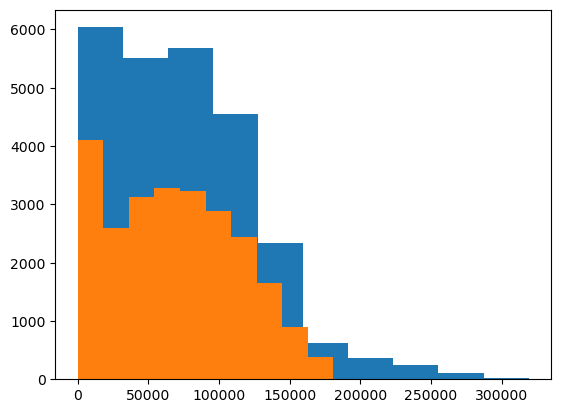

In [16]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
# plt.boxplot(outliers_df['prevailing_wage'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdb080b010>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdb0811750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdb0809c90>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdb08138d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdafc20810>],
 'means': []}

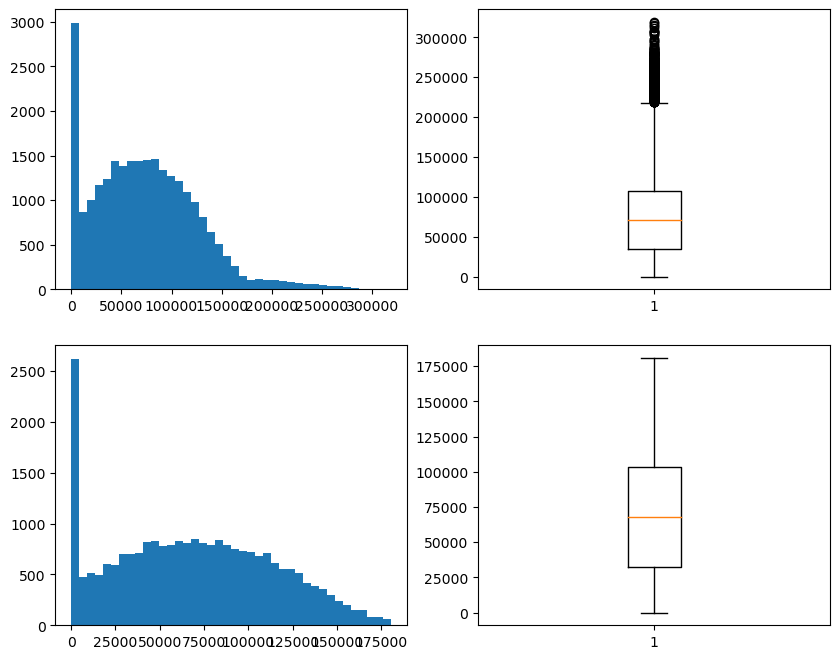

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdb130ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdb131c710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdb130e390>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdb131dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdb130eed0>],
 'means': []}

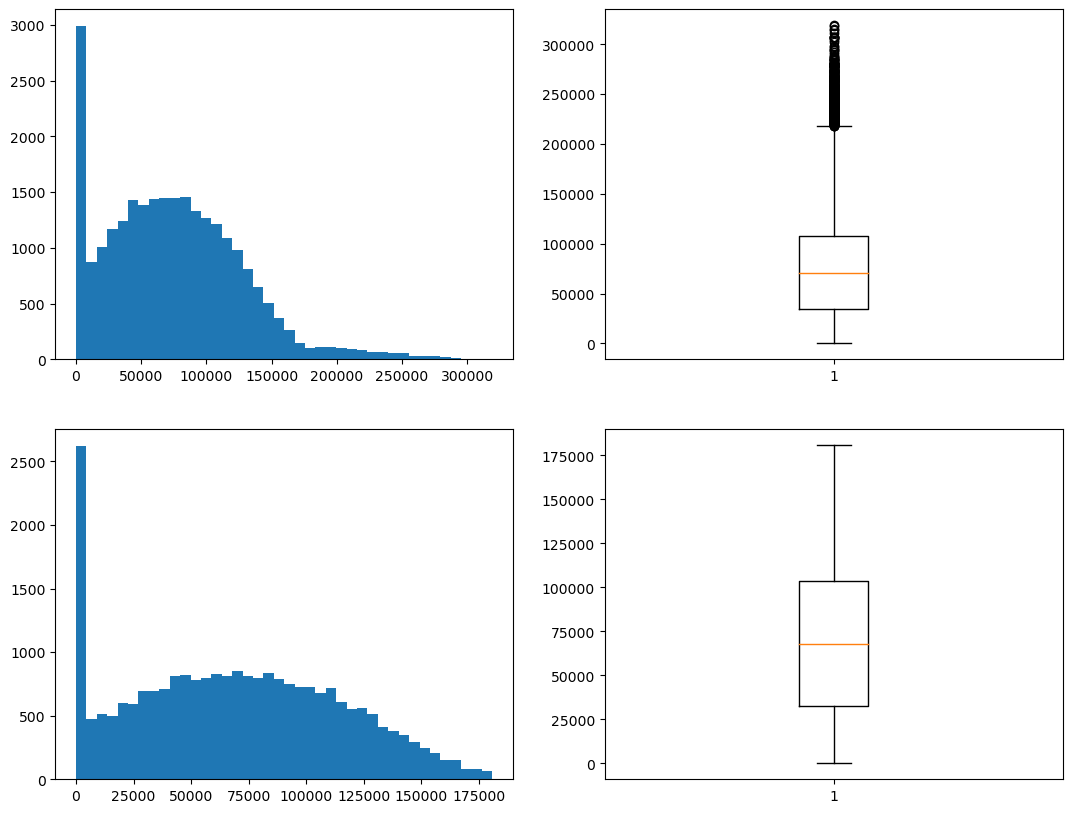

In [21]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])

## How to deal the ouliers ##

# **Drop the outliers**
#     - we can drop the outliers if the outlier percentage is <2%
#     - but this is not recommended , we lost other columns data also
    
# **Impute with Median values**
#     - as we know that Median doesnt get affected by outlirs
#     - So its good pracice that we can impute outliers with Median value
# **Cap with Q3 or Q1 value**
#     - if outliers are present with less than lower bound then fill with Q1
#     - if outliers are more than upper bound then fill with Q3

In [ ]:
# Task 3 
# Read each observation from prevailing wage 
#  if that observation <lb or >ub : fill with median value 
# else : keep as it is 

# take empty list =[]
# median=visa_df['pwage'].median()
# for i in visa_df['pwage']:
#   ifi<lb or i>ub:
#     emptylist.append(median)
#   else:
#     empltylist.append(i)

# 25480

In [28]:
emp=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>up:
        emp.append(median)
    else:
        emp.append(i)
# print(emp,end=' ')
# len(emp)
visa_df['prevailing_wage_new']=emp

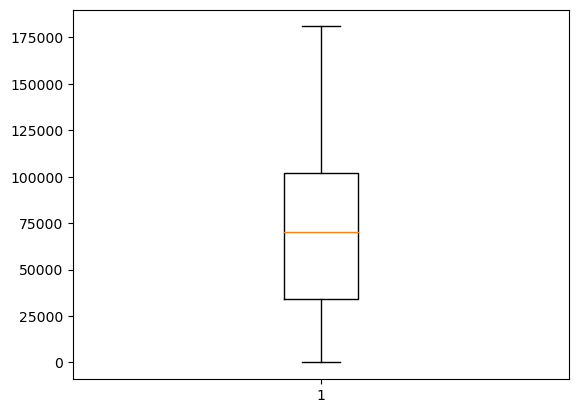

In [29]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

In [30]:
# read the data again 
path =r'C:\Users\aramaiah.ASUAD\Naresh_IT\MyDataScience\Data_Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


- above replace one we use a traditional approach 
- for loop, list, if-else
- the same we can get by using np.where method

In [32]:
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
pd.DataFrame(dict1)

,Name,Num
0,A,1
1,B,2
2,C,3
3,D,4


In [34]:
# I want to replace num which has >2
# otherwise keep the same number
l=[]
for i in d['num']:
    if i>2:
        l.append(100)
    else:
        l.append(i)
# d['num']=1
d
d['num']>2

NameError: name 'd' is not defined

In [5]:
# 9) Find the ASCII value of capital A TO Z . Make the letters and their ASCII value in a Data Frame-python.

letters = [chr(i) for i in range(ord('A'), ord('Z')+1)]

ascii_values = [ord(letter) for letter in letters]


df = pd.DataFrame({'Letter': letters, 'ASCII_Value': ascii_values})

print(df)


   Letter  ASCII_Value
0       A           65
1       B           66
2       C           67
3       D           68
4       E           69
5       F           70
6       G           71
7       H           72
8       I           73
9       J           74
10      K           75
11      L           76
12      M           77
13      N           78
14      O           79
15      P           80
16      Q           81
17      R           82
18      S           83
19      T           84
20      U           85
21      V           86
22      W           87
23      X           88
24      Y           89
25      Z           90


In [6]:
# 10) Print the Fibonacci Series using for loop
num_terms = 10
a, b = 0, 1
print("Fibonacci Series:")
print(a)
print(b)

for _ in range(2, num_terms):

    next_term = a + b
   
    a, b = b, next_term
  
    print(next_term)


Fibonacci Series:
0
1
1
2
3
5
8
13
21
34


In [ ]:
# 2a.Explain the types of sampling in statistics-theory.
# Cluster Sampling
# SRS Sampling
# Systemic Sampling
# Quota sampling
# Stratified sampling 
# Convenience sampling
